# The Sparks Foundation

## Task-3: Exploratory Data Analysis - Retail

### Business problem : As a business manager , from the given dataset , we need to find out the weak areas where we can work to increase the profit 


## Name- Labdhi Rathore

In [1]:
#import the important liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\mayan\Desktop\Labdhi\DS_Grip\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


As per the result of above query there is no null values in the dataset , so we can move forward to get the more details about the dataset.

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# To know about the total sales and the profit generated by the retail store.

print('Sales:',df['Sales'].sum())
print('Profit:',df['Profit'].sum())

Sales: 2297200.8603
Profit: 286397.0217


In [9]:
# To check weather there is any duplicate row in the dataset

df.duplicated().sum()

17

In [10]:
df[df.duplicated()].shape

(17, 13)

In [11]:
df= df.drop_duplicates()

In [12]:
df.shape

(9977, 13)

## Regional Analysis
To know the highest transactions made in which region

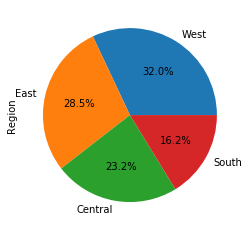

In [13]:
# To check maximum transactions made regionwise

df.Region.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

**This Pie-Chart depicts that maximum transanctions were made in WEST region followed by EAST and then we have Central at last SOUTH is at bottom**

Next we will check the what amount sales and profits are being made by each region

C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


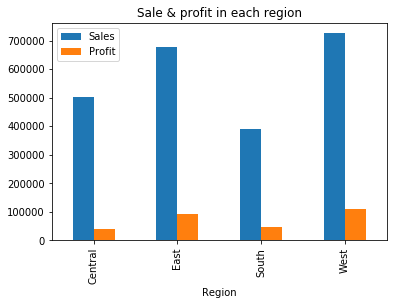

In [14]:
df.groupby('Region')['Sales','Profit'].sum().plot.bar()
plt.title('Sale & profit in each region')
plt.legend()
plt.show()

**From above graphical representation , we can see that west region made the highest sales and profit, whereas south region has least sales and profit**

# Customer Analysis

### To check the sales and profit in each segment.

C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


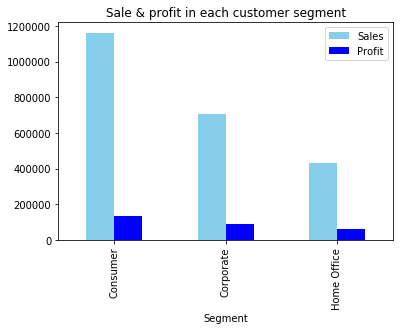

In [15]:
df.groupby('Segment')['Sales','Profit'].sum().plot.bar(color=['skyblue','blue'])
plt.title('Sale & profit in each customer segment')
plt.legend()
plt.show()

**So the graph presents that Consumer segment is the one which has maximum buying capacity. Also they give maximum profit to Superstore whereas Home Office purchases less and add less profit to business**

#### Now we will check Ship Mode Segment wise

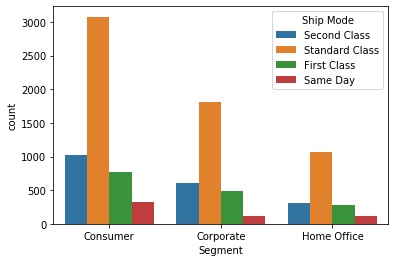

In [16]:
# To know the ship mode of transactions in each segment

sns.countplot(x='Segment' , hue='Ship Mode' , data=df)
plt.show()

**From above graph, we can see that highest transactions shipped in standard class**

## Product Analysis

C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


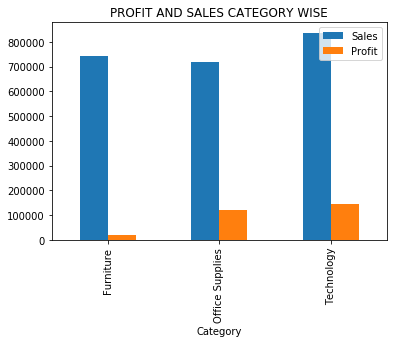

In [18]:
# To check profit and sales Product wise
df.groupby('Category')['Sales','Profit'].sum().plot.bar()
plt.title('PROFIT AND SALES CATEGORY WISE')
plt.legend(loc = 1)
plt.show()

**This Bar Plot shows that Technology has given maximum sales subsequently Profit was also maximum. But not following this trend Furniture also had sales at great amount following with least amount of profit.**

C:\Users\mayan\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


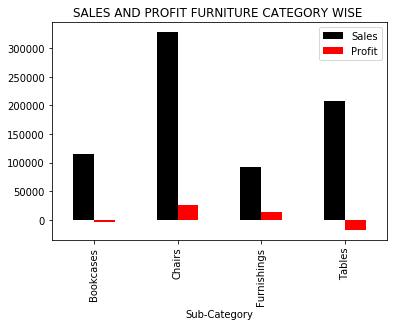

In [19]:
df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar(color = ['black','red'])
plt.title('SALES AND PROFIT FURNITURE CATEGORY WISE ')
plt.legend(loc = 1)
plt.show()

**So we have sub categories of Furniture which are Bookcases,Chairs,Furnishings and Tables. With this Bar Plot we can conclude that irrespective of high sales in Tables and Bookcases the store is incurring loss. This loss is affecting the whole of Furniture Category**

Now we need to check irrespective of high sales why are we incurring loss?

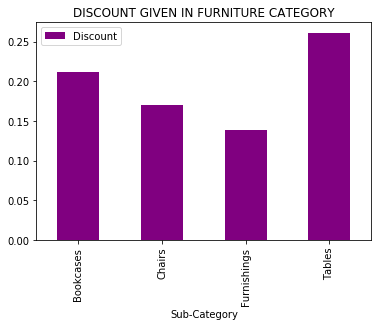

In [22]:
# To check the probable reason of loss 

df[df['Category'] == 'Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar(color =['purple'])
plt.title('DISCOUNT GIVEN IN FURNITURE CATEGORY')
plt.legend(loc = 0)
plt.show()

**from above, we can conclude that in tables and bookcases , high discount is there as compare to others, so it might be an cause for the loss in the category**

**Now, we'll check whether discount is effecting the profit or not**

In [23]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


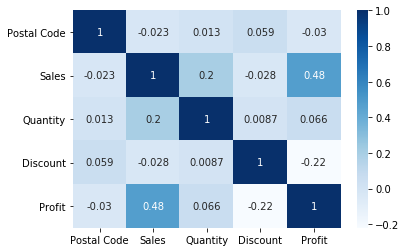

In [24]:
# To check the correlation in between Sales and Discount

sns.heatmap(df.corr(),annot=True , cmap= 'Blues')
plt.show()

**From above Heatmap we concluded there is a Negative correlation in between Profit and Discount whereas a Positive correlation between Profit and Sales**

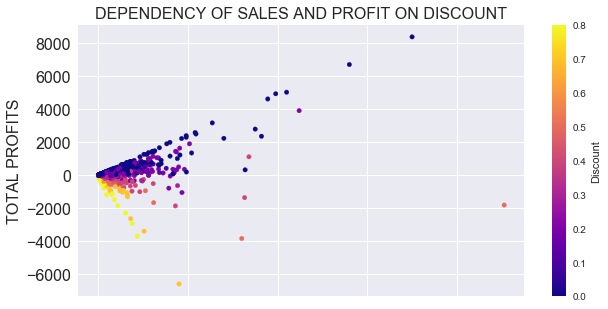

In [25]:
plt.style.use('seaborn')
df.plot(kind = 'scatter', figsize = (10,5) , x = 'Sales', y='Profit', c = 'Discount' , s = 20 , fontsize = 16 , colormap = 'plasma')
plt.ylabel('TOTAL PROFITS', fontsize = 16)
plt.title('DEPENDENCY OF SALES AND PROFIT ON DISCOUNT' , fontsize = 16)
plt.show()

**The above Scatterplot depicts that less the discount more is the Profits Discount is effecting profit to a certain extent and after that point Profits has no relation with Discount**

## TOP PRODUCTS

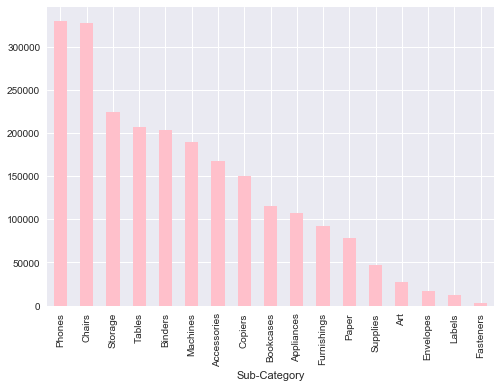

In [26]:
# Now we will check the Top Products Sold

df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color = 'pink')
plt.show()

**With this we concluded that Phones,Chairs ,Storage,Tables and Binders are being sold at max consecutively. Whereas Fasteners,Labels and Envelopes were sold the least.**

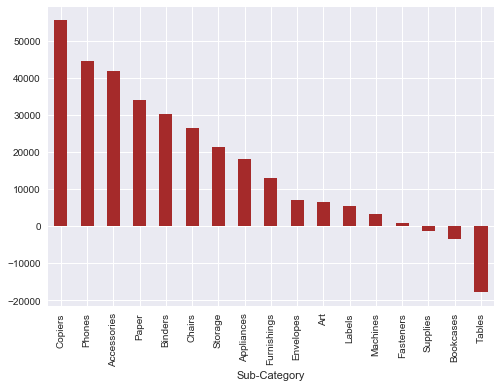

In [27]:
#To check the profit earned in all the  Sub-Categories

df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(color = 'brown')
plt.show()

**Here we saw Copiers ,Phones,Accessories are top profit giving products to the store. whereas Store is incurring losses due to Tables ,Bookcases and suppliers.**

# OBSERVATIONS:
- **MAXIMUM TRANSACTIONS** were made in **WEST REGION**
- **MAXIMUM SALES** in **WEST REGION**
- **MAXIMUM PROFITS** in **WEST REGION**
- **MAXIMUM SALES AND PROFIT** in **CONSUMER SEGMENT**
- **MAXIMUM TRANSACTIONS** were shipped in **STANDARD CLASS** irrespective of **SEGMENT**
- **LEAST PROFIT** is incurred in **FURNITURE CATEGORY** irrespective of good amount of Sales
- Under **FURNITURE, TABLES and BOOKCASES** are **INCURRING LOSSES** which is effecting the **TOTAL PROFIT** of Furniture Category
- **HIGH DISCOUNT** is being offered in **TABLES and BOOKCASES** which is somewhere the probable reason of losses.
- **POSITIVE CORRELATION**:Profit and Sales
- **NEGATIVE CORRELATION**:Profit and Discount
- **LESS the DISCOUNT ,MORE the PROFIT** and vice-versa

# CONCLUSION:
**We conclude, "furniture category" is the weak area as compare to others. And, under furniture category, "Tables and bookcases" incurring the loss because of the more discount offered in the same . Therefore , We can "decrease the discount" to avoid the loss in these categories.**
